In [45]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [6]:
path_to_file = 'C:/Users/olran/Desktop/Appflame_test/test3.xlsx'

In [7]:
xl = pd.ExcelFile(path_to_file)
df_test3 = xl.parse('Аркуш1')

In [9]:
display( df_test3.dtypes, df_test3.shape)

sender_id               int64
platform_id             int64
time_stamp     datetime64[ns]
gender                 object
reg_date       datetime64[ns]
dtype: object

(768439, 5)

In [10]:
df_test3

,sender_id,platform_id,time_stamp,gender,reg_date
0,3207526951,6,2017-03-16 13:35:00,m,2017-01-26
1,3207526951,6,2017-03-16 09:09:00,m,2017-01-26
2,3207526951,6,2017-03-16 09:09:00,m,2017-01-26
3,3207526951,6,2017-03-16 12:13:00,m,2017-01-26
4,3207526951,6,2017-03-15 14:01:00,m,2017-01-26
...,...,...,...,...,...
768434,3208782485,6,2017-03-23 01:11:00,m,2017-02-01
768435,3208782485,6,2017-03-23 01:11:00,m,2017-02-01
768436,3208782485,6,2017-03-23 01:10:00,m,2017-02-01
768437,3208782485,6,2017-03-23 01:10:00,m,2017-02-01


In [16]:
df_test3['group'] = df_test3 ['sender_id'] % 2
#Створення нової колонки, де 0 - це група А, де нічого не змінилось, а 1 - група В, де були проведені зміни

In [18]:
df_test3['group'].value_counts()

group
0    385684
1    382755
Name: count, dtype: int64

In [19]:
test_start_time = pd.Timestamp('2017-03-24 16:00:00')
#Задано час відліку: до та після

In [21]:
df_test3['period'] = None

df_test3.loc[df_test3['time_stamp'] < test_start_time, 'period'] = 'before'
df_test3.loc[df_test3['time_stamp'] >= test_start_time, 'period'] = 'after'

In [24]:
df_test3['period'].value_counts()

period
before    660847
after     107592
Name: count, dtype: int64

In [25]:
df_test3.groupby('group')['period'].count()

group
0    385684
1    382755
Name: period, dtype: int64

In [36]:
grouped_data = df_test3.groupby(['group', 'period']).size()
grouped_data
#Кількість лайків для кожної групи та періоду

group  period
0      after      57628
       before    328056
1      after      49964
       before    332791
dtype: int64

In [48]:
#Більш привабливий варіант
test_likes_before = grouped_data.loc[1, 'before']
test_likes_after = grouped_data.loc[1, 'after']

control_likes_before = grouped_data.loc[0, 'before']
control_likes_after = grouped_data.loc[0, 'after']

summary = pd.DataFrame({
    'group': ['test', 'control'],
    'likes_before': [test_likes_before, control_likes_before],
    'likes_after': [test_likes_after, control_likes_after]
})
summary

,group,likes_before,likes_after
0,test,332791,49964
1,control,328056,57628


In [42]:
observed = [[test_likes_before, test_likes_after],
            [control_likes_before, control_likes_after]]

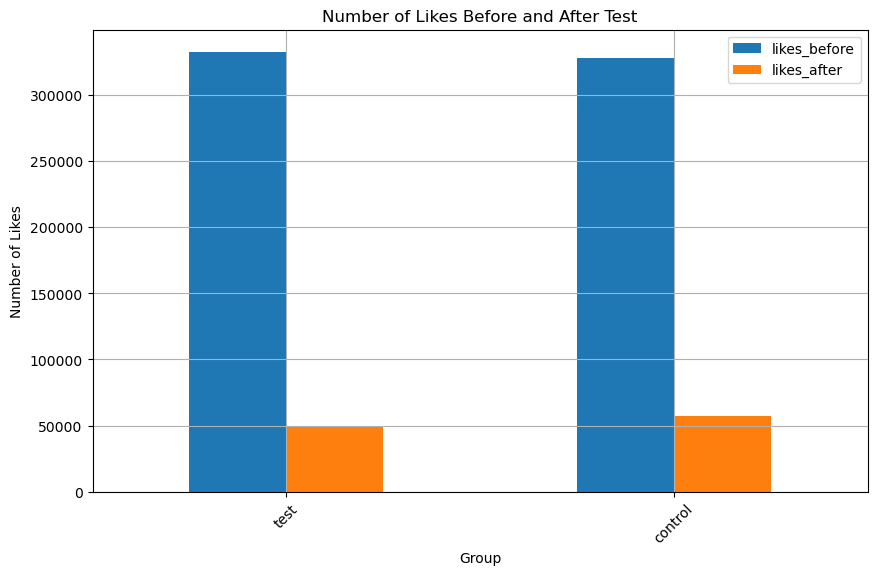

Reject the null hypothesis. There is a significant difference between the groups.


In [49]:
chi2, p, _, _ = chi2_contingency(observed)

significance_level = 0.05
result = 'Reject the null hypothesis. There is a significant difference between the groups.' if p < significance_level else 'Fail to reject the null hypothesis. No significant difference between the groups.'

fig, ax = plt.subplots(figsize=(10, 6))
summary.plot(x='group', y=['likes_before', 'likes_after'], kind='bar', ax=ax)
plt.title('Number of Likes Before and After Test')
plt.xlabel('Group')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(result)
